## 预处理

### load basic data

1. load them and impute
2. save to feather

In [1]:
import pandas as pd

import statsmodels.api as sm
import pandas as pd
import datetime
from pathlib import Path

pd.set_option("display.max_columns", None)
# !pip install statsmodels

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


# from cadFace.vis import percentiles_plot
import sci_palettes

try:
    sci_palettes.register_cmap()
except:
    pass
from pathlib import Path
import pandas as pd

In [2]:
ukbData = "/home/xutingfeng/ukb/ukbData/"

risk_factors = [
    "age",
    "sex",
    "ldl_a",
    "hdl_a",
    "tc_a",
    "tg_a",
    "sbp_a",
    "BMI",
    "smoking",
    "prevalent_diabetes",
]


omicsDirDict = {
    "Meta": {
        "path": ukbData + "omics/metabolomics/parsed/2024/init_visit_INT.pkl",
        "feature": "all",
    },
    "Prot": {"path": ukbData + "omics/proteomics/Olink_v1.pkl", "feature": "all"},
    "PRS": {
        "path": "/home/xutingfeng/ukb/ukbData/PRS/ldpred2_cxy.tsv",
        "feature": "all",
    },
    "somaRS": {"path": ukbData + "dataset_final.tsv.gz", "feature": ["LTL", "CHIP"]},
    "RF": {"path": ukbData + "phenotypes/tf/all_pheno.pkl", "feature": risk_factors},
}


rootDir = Path("MulitOmicsDisease/")
dataDir = rootDir / "omicsData/"
dataDir.mkdir(parents=True, exist_ok=True)

### Prot 处理

In [60]:
protein_missing_drop_rate_cutoff = 0.2  # drop protein with missing rate > 0.2

Missing protein rate top five protein: 
GLIPR1    0.996888
NPM1      0.739858
PCOLCE    0.635842
CST1      0.266592
CTSS      0.236510
dtype: float64
Protein missing rate > 0.2 : 12
droped proteins are: 
GLIPR1 NPM1 PCOLCE CST1 CTSS ENDOU AMY1A_AMY1B_AMY1C BPIFA2 OLFM4 CFH PSTPIP2 LEG1
Finnaly used protein number: 2911 with sample size: 53021
 raw data is (53021, 2912) and 47142 rows with na
Will use mean to replace na


C3      KLK7     GCHFR    NHLRC3     APOD     GAPDH   TP53I3  \
eid                                                                           
1000115  0.040385  0.007345  0.057373 -0.000238  0.02491 -0.065304  0.02669   
1000127 -0.164800  0.419150  0.075800 -0.104300  0.61420 -0.289500 -0.29590   
1000149  0.040385  0.007345  0.057373 -0.000238  0.02491 -0.065304  0.02669   
1000194 -0.233500  3.085400 -0.536100 -0.009300  0.10330  0.190550 -0.04340   
1000258 -0.192100  0.661400 -0.182000 -0.605800  0.03110 -0.074300  0.40350   
...           ...       ...       ...       ...      ...       ...      ...   
6023931  0.306700  0.007345  0.057373 -0.000238 -0.33020 -0.065304  0.02669   
6024012  0.040385  0.007345  0.057373 -0.000238  0.02491 -0.065304  0.02669   
6024020 -0.281200  0.518900 -0.313800 -0.036800  0.45980 -0.000600  0.13630   
6024098  0.040385  0.007345  0.057373 -0.000238  0.02491 -0.065304  0.02669   
6024110 -0.442900  0.342350  0.042300 -0.664900  0.23460 -0.311000 -0.19070   

             CPA4     ANXA2     GRSF1      IL25      HMMR    MRPL52    PAIP2B  \
eid                                                                             
1000115 -0.009212  0.073499  0.082175 -0.019463  0.054938 -0.003103  0.029678   
1000127  0.108650 -0.447300 -0.621900 -0.022700  0.203900 -0.026550  0.187800   
1000149 -0.009212  0.073499  0.082175 -0.019463  0.054938 -0.003103  0.029678   
1000194  0.191500  0.378250  0.666600 -0.543500  0.542750  0.044800 -0.180450   
1000258 -0.836700  0.637800  0.863700  0.391700 -0.008300  0.038500 -0.488450   
...           ...       ...       ...       ...       ...       ...       ...   
6023931 -0.009212  0.089700  0.521200  0.075500 -0.028800 -0.577700 -1.058450   
6024012 -0.009212  0.073499  0.082175 -0.019463  0.054938 -0.003103  0.029678   
6024020  0.209500 -0.002300  0.365300  0.273200  0.509100  0.245500  0.040150   
6024098 -0.009212  0.073499 -0.290800 -0.154000 -0.263600 -0.176700 -0.162950   
6024110  0.373650 -0.121500  0.055900 -0.247300  0.083800 -0.196950 -0.297200   

           THAP12       FOS      FGF9    PITHD1     THSD1    PTGES2  \
eid                                                                   
1000115  0.174497 -0.013819 -0.021022  0.161046  0.007754  0.036311   
1000127  0.410000 -0.015500  0.247800  0.028300  0.100950 -0.251400   
1000149  0.174497 -0.013819 -0.021022  0.161046  0.007754  0.036311   
1000194  1.163600  0.240900  0.857100  2.739650  0.505000 -0.024400   
1000258  0.023400  0.280100  0.367500  0.164700  0.007754  0.036311   
...           ...       ...       ...       ...       ...       ...   
6023931 -0.443000 -0.142900 -0.628900 -0.796400 -0.138900  0.806100   
6024012  0.174497 -0.013819 -0.021022  0.161046  0.007754  0.036311   
6024020 -0.421200  0.043100 -0.290500 -0.122900  0.161800  0.816600   
6024098  0.607400  0.082300  0.024400 -0.632600 -0.121600  0.071700   
6024110 -0.041200 -0.308100  0.266400 -0.041700 -0.183150 -0.381900   

         DEFB103A_DEFB103B    ATP1B4     CYB5A     UNC79   SLC34A3    TAGLN3  \
eid                                                                            
1000115           0.046926  0.043311  0.082135  0.058686  0.032686 -0.012728   
1000127           0.577200 -0.565300  0.325800  0.152500  0.162050  0.206400   
1000149           0.046926  0.043311  0.082135  0.058686  0.032686 -0.012728   
1000194          -0.028700  0.140050  0.168400  0.321300 -0.063950 -0.220400   
1000258          -0.173700 -0.015150  0.102100  0.442600  0.127350  0.820600   
...                    ...       ...       ...       ...       ...       ...   
6023931           0.194900 -0.013350 -0.229100 -0.134600 -0.110750 -0.437900   
6024012           0.046926  0.043311  0.082135  0.058686  0.032686 -0.012728   
6024020          -0.009000 -0.175250  0.051600 -0.172900  1.019650 -0.345400   
6024098           0.046926 -0.215650  0.136900 -0.111600  0.469150  0.149900   
6024110           0.980900 -0.164300  0.352600 -0

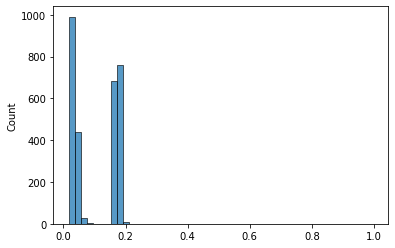

In [61]:
olink = pd.read_pickle(omicsDirDict["Prot"]["path"])

olink_missing_protein_rate = (olink.isna().sum(axis=0) / olink.shape[0]).sort_values(
    ascending=False
)

print(f"Missing protein rate top five protein: \n{olink_missing_protein_rate.head(5)}")
sns.histplot(olink_missing_protein_rate, bins=50)


# olink_missing_protein_rate
print(
    f"Protein missing rate > {protein_missing_drop_rate_cutoff} : {sum(olink_missing_protein_rate > protein_missing_drop_rate_cutoff)}"
)
print(
    f"droped proteins are: \n{' '.join(olink_missing_protein_rate[olink_missing_protein_rate > protein_missing_drop_rate_cutoff].index.tolist())}"
)
olink = olink.loc[
    :,
    olink_missing_protein_rate[
        olink_missing_protein_rate <= protein_missing_drop_rate_cutoff
    ].index,
]
print(
    f"Finnaly used protein number: {olink.shape[1]} with sample size: {olink.shape[0]}"
)

## final used protein imputed with mean

from ppp_prediction.impute import impute

olink_imputed = impute(olink.reset_index(drop=False), method="mean").set_index("eid")
ProtCols = olink_imputed.columns.tolist()
olink_imputed.index = olink_imputed.index.astype(int)
olink_imputed

In [62]:
if olink_imputed.index.name == "eid" and "eid" not in olink_imputed.columns:
    olink_imputed.reset_index(drop=False, inplace=True)

/tmp/ipykernel_4002/936910834.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  olink_imputed.reset_index(drop=False, inplace=True)


In [63]:
omicsDirDict["Prot"]["data"] = olink_imputed
olink_imputed.to_feather(dataDir / "Prot.feather")
del olink, olink_imputed

### Meta 处理

In [64]:
missing_drop_rate = 0

eid
1906206    0.947059
5779826    0.882353
1954666    0.788235
5493761    0.194118
3151535    0.194118
5425456    0.194118
2008212    0.147059
2983247    0.135294
5605254    0.135294
5240198    0.135294
dtype: float64
raw data have samples:274298
drop 13319 samples with missing rate > 0
after drop missing rate too high, left metabolism shape: (260979, 170)


,eid,3-Hydroxybutyrate,Acetate,Acetoacetate,Acetone,Alanine,Albumin,Apolipoprotein A1,Apolipoprotein B,Average Diameter for HDL Particles,Average Diameter for LDL Particles,Average Diameter for VLDL Particles,Cholesterol in Chylomicrons and Extremely Large VLDL,Cholesterol in IDL,Cholesterol in Large HDL,Cholesterol in Large LDL,Cholesterol in Large VLDL,Cholesterol in Medium HDL,Cholesterol in Medium LDL,Cholesterol in Medium VLDL,Cholesterol in Small HDL,Cholesterol in Small LDL,Cholesterol in Small VLDL,Cholesterol in Very Large HDL,Cholesterol in Very Large VLDL,Cholesterol in Very Small VLDL,Cholesteryl Esters in Chylomicrons and Extremely Large VLDL,Cholesteryl Esters in HDL,Cholesteryl Esters in IDL,Cholesteryl Esters in LDL,Cholesteryl Esters in Large HDL,Cholesteryl Esters in Large LDL,Cholesteryl Esters in Large VLDL,Cholesteryl Esters in Medium HDL,Cholesteryl Esters in Medium LDL,Cholesteryl Esters in Medium VLDL,Cholesteryl Esters in Small HDL,Cholesteryl Esters in Small LDL,Cholesteryl Esters in Small VLDL,Cholesteryl Esters in VLDL,Cholesteryl Esters in Very Large HDL,Cholesteryl Esters in Very Large VLDL,Cholesteryl Esters in Very Small VLDL,Citrate,Clinical LDL Cholesterol,Concentration of Chylomicrons and Extremely Large VLDL Particles,Concentration of HDL Particles,Concentration of IDL Particles,Concentration of LDL Particles,Concentration of Large HDL Particles,Concentration of Large LDL Particles,Concentration of Large VLDL Particles,Concentration of Medium HDL Particles,Concentration of Medium LDL Particles,Concentration of Medium VLDL Particles,Concentration of Small HDL Particles,Concentration of Small LDL Particles,Concentration of Small VLDL Particles,Concentration of VLDL Particles,Concentration of Very Large HDL Particles,Concentration of Very Large VLDL Particles,Concentration of Very Small VLDL Particles,Creatinine,Degree of Unsaturation,Docosahexaenoic Acid,Free Cholesterol in Chylomicrons and Extremely Large VLDL,Free Cholesterol in HDL,Free Cholesterol in IDL,Free Cholesterol in LDL,Free Cholesterol in Large HDL,Free Cholesterol in Large LDL,Free Cholesterol in Large VLDL,Free Cholesterol in Medium HDL,Free Cholesterol in Medium LDL,Free Cholesterol in Medium VLDL,Free Cholesterol in Small HDL,Free Cholesterol in Small LDL,Free Cholesterol in Small VLDL,Free Cholesterol in VLDL,Free Cholesterol in Very Large HDL,Free Cholesterol in Very Large VLDL,Free Cholesterol in Very Small VLDL,Glucose,Glucose-lactate,Glutamine,Glycine,Glycoprotein Acetyls,HDL Cholesterol,Histidine,Isoleucine,LDL Cholesterol,Lactate,Leucine,Linoleic Acid,Monounsaturated Fatty Acids,Omega-3 Fatty Acids,Omega-6 Fatty Acids,Phenylalanine,Phosphatidylcholines,Phosphoglycerides,Phospholipids in Chylomicrons and Extremely Large VLDL,Phospholipids in HDL,Phospholipids in IDL,Phospholipids in LDL,Phospholipids in Large HDL,Phospholipids in Large LDL,Phospholipids in Large VLDL,Phospholipids in Medium HDL,Phospholipids in Medium LDL,Phospholipids in Medium VLDL,Phospholipids in Small HDL,Phospholipids in Small LDL,Phospholipids in Small VLDL,Phospholipids in VLDL,Phospholipids in Very Large HDL,Phospholipids in Very Large VLDL,Phospholipids in Very Small VLDL,Polyunsaturated Fatty Acids,Pyruvate,"Remnant Cholesterol (Non-HDL, Non-LDL -Cholesterol)",Saturated Fatty Acids,Spectrometer-corrected alanine,Sphingomyelins,Total Cholesterol,Total Cholesterol Minus HDL-C,Total Cholines,Total Concentration of Branched-Chain Amino Acids (Leucine + Isoleucine + Valine),Total Concentration of Lipoprotein Particles,Total Esterified Cholesterol,Total Fatty Acids,Total Free Cholesterol,Total Lipids in Chylomicrons and Extremely Large VLDL,Total Lipids in HDL,Total Lipids in IDL,Total Lipids in LDL,Total Lipids in Large HDL,Total Lipids in Large LDL,Total Lipids in Large VLDL,Total Lipids in Lipoprotein Particles,Total Lipids in Medium HDL,Total Lipids in Medium LDL,Total Lipids in Medium VLDL,Total Lipids in Small HDL,Total Lipids in Small LDL,Tot

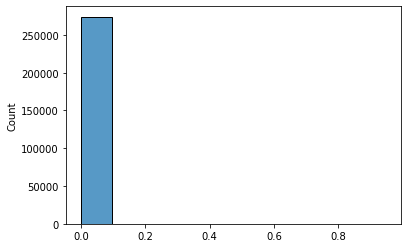

In [65]:
metabolismPath = omicsDirDict["Meta"]["path"]

# preprocessing
metabolism = pd.read_pickle(metabolismPath).set_index("eid")
if "index" in metabolism.columns:
    metabolism.drop("index", axis=1, inplace=True)


metabolism_symbol_list = metabolism.columns.tolist()
metabolism_missing_rate = (
    metabolism.isna().sum(axis=1) / metabolism.shape[1]
).sort_values(ascending=False)
print(metabolism_missing_rate[:10])
sns.histplot(metabolism_missing_rate, bins=10)

# 去除缺失率大于0的样本
missing_drop_rate = 0
print(f"raw data have samples:{metabolism.shape[0]}")
to_drop = metabolism_missing_rate[metabolism_missing_rate > missing_drop_rate].index
print(f"drop {len(to_drop)} samples with missing rate > {missing_drop_rate}")
metabolism = metabolism.drop(to_drop)
# metabolism = metabolism.loc[to_drop]
print(f"after drop missing rate too high, left metabolism shape: {metabolism.shape}")


MetaCols = metabolism.columns.tolist()
metabolism.index = metabolism.index.astype(int)

if metabolism.index.name == "eid" and "eid" not in metabolism.columns:
    metabolism.reset_index(drop=False, inplace=True)


metabolism

In [66]:
omicsDirDict["Meta"]["data"] = metabolism
metabolism.to_feather(dataDir / "Meta.feather")

### RF 

In [3]:
all_pheno = pd.read_pickle(omicsDirDict["RF"]["path"])  # load from all_pheno.pkl


from ppp_prediction.impute import impute

print(all_pheno[risk_factors].info())
all_pheno.reset_index(drop=False, inplace=True)
all_pheno[["ldl_a", "hdl_a", "tc_a", "tg_a", "sbp_a", "BMI"]] = impute(
    all_pheno[["ldl_a", "hdl_a", "tc_a", "tg_a", "sbp_a", "BMI"]].reset_index(
        drop=True
    ),
    method="mean",
)
all_pheno[risk_factors].info()


print(
    all_pheno["smoking"].value_counts(),
    all_pheno["smoking"].isna().sum(),
)
print(
    all_pheno["prevalent_diabetes"].value_counts(),
    all_pheno["prevalent_diabetes"].isna().sum(),
)

all_pheno["smoking"] = all_pheno["smoking"].fillna(0)
all_pheno["prevalent_diabetes"] = all_pheno["prevalent_diabetes"].fillna(0)


print(
    all_pheno["smoking"].value_counts(),
    all_pheno["smoking"].isna().sum(),
)
print(
    all_pheno["prevalent_diabetes"].value_counts(),
    all_pheno["prevalent_diabetes"].isna().sum(),
)

all_pheno["eid"] = all_pheno["eid"].astype(int)

if omicsDirDict["RF"]["feature"] != "all":
    RF = all_pheno[["eid"] + omicsDirDict["RF"]["feature"]]
else:
    RF = all_pheno

RF

<class 'pandas.core.frame.DataFrame'>
Int64Index: 502409 entries, 1000017 to 6024122
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   age                 502406 non-null  float64
 1   sex                 502244 non-null  float64
 2   ldl_a               468617 non-null  float64
 3   hdl_a               429791 non-null  float64
 4   tc_a                469500 non-null  float64
 5   tg_a                469125 non-null  float64
 6   sbp_a               467969 non-null  float64
 7   BMI                 499415 non-null  float64
 8   smoking             499294 non-null  float64
 9   prevalent_diabetes  499627 non-null  float64
dtypes: float64(10)
memory usage: 42.2 MB
None
 raw data is (502409, 6) and 102738 rows with na
Will use mean to replace na
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502409 entries, 0 to 502408
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype

,eid,age,sex,ldl_a,hdl_a,tc_a,tg_a,sbp_a,BMI,smoking,prevalent_diabetes
0,1000017,56.0,1.0,4.589,1.179000,7.018,3.553,149.000000,30.2528,1.0,0.0
1,1000025,62.0,1.0,3.543,1.259000,5.541,3.151,157.000000,36.7704,1.0,0.0
2,1000038,60.0,1.0,3.640,0.954000,5.462,2.386,141.422413,34.8228,0.0,0.0
3,1000042,60.0,1.0,4.210,1.114000,5.814,2.835,175.000000,26.9949,1.0,0.0
4,1000056,65.0,0.0,2.398,1.595000,4.204,0.997,133.000000,27.0993,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
502404,6024086,66.0,0.0,4.430,1.177000,6.622,2.423,136.000000,37.1058,1.0,1.0
502405,6024098,68.0,1.0,4.152,1.447676,6.460,2.560,167.000000,27.1643,0.0,0.0
502406,6024103,61.0,1.0,4.038,0.923000,6.063,3.409,166.000000,31.8282,2.0,0.0
502407,6024110,66.0,1.0,3.477,1.312000,5.326,1.170,143.000000,23.3649,1.0,0.0


In [68]:
RF.to_feather(dataDir / "RF.feather")
omicsDirDict["RF"]["data"] = RF

### Somatic Risk Factors

In [69]:
somaRS = omicsDirDict["somaRS"]["path"]

somaRS = pd.read_csv(somaRS, sep="\s+")[["eid", "CHIP", "LTL"]]

somaRS.eid = somaRS.eid.astype(int)

omicsDirDict["somaRS"]["data"] = somaRS
somaRS.to_feather(dataDir / "somaRS.feather")

### PRS 

In [70]:
PRS_path = omicsDirDict["PRS"]["path"]

PRS = pd.read_csv(PRS_path, sep="\t")
PRS.columns = ["eid", "PRS"]

PRS["eid"] = PRS["eid"].astype(int)
PRS["PRS"] = -1 * PRS["PRS"]  # this is because the wrong direction of PRS
omicsDirDict["PRS"]["data"] = PRS
PRS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 487409 entries, 0 to 487408
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   eid     487409 non-null  int64  
 1   PRS     487409 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 7.4 MB


In [71]:
PRS.to_feather(dataDir / "PRS.feather")

## 切分数据集


Prot和Meta是数据量最少得，因此最终的分数整合模型采用他俩的交集即可
>当然这部分也可以自行修改，以符合需求

>例如，前面不采用imputed，保留所有数据均不存在NA的部分作为heldout等

In [44]:
# !pip install matplotlib_venn
from matplotlib_venn import venn2, venn2_circles

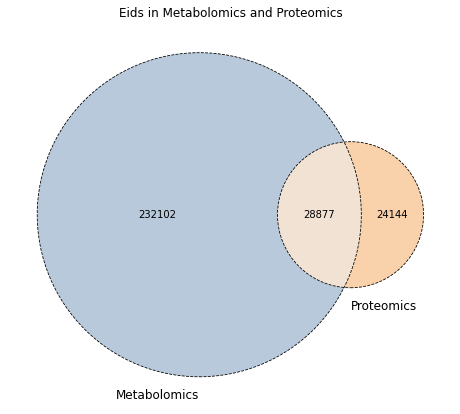

In [72]:
# check eids inner

Meta_eids = set(omicsDirDict["Meta"]["data"]["eid"])
Prot_eids = set(omicsDirDict["Prot"]["data"]["eid"])

# plot venn
plt.figure(figsize=(8, 8))
g = venn2(
    [Meta_eids, Prot_eids],
    ("Metabolomics", "Proteomics"),
    set_colors=("#4e79a7", "#f28e2b"),
)
g = venn2_circles(
    subsets=[Meta_eids, Prot_eids],
    linestyle="--",
    linewidth=0.8,
    color="black",  # 外框线型、线宽、颜色
)
plt.title("Eids in Metabolomics and Proteomics")

plt.show()

In [73]:
inner_eids = Meta_eids.intersection(Prot_eids)

heldout_df = pd.DataFrame({"eid": list(inner_eids)})
for omic in omicsDirDict:
    heldout_df = heldout_df.merge(omicsDirDict[omic]["data"], on="eid", how="left")
heldout_df

eid  3-Hydroxybutyrate   Acetate  Acetoacetate   Acetone   Alanine  \
0      1048581          -0.089942 -0.072746      0.262189 -0.281183  0.138001   
1      1572870          -0.937515 -0.419211     -1.519993 -0.562907 -0.047771   
2      5636111           1.220849 -0.001395      1.363139  0.484480 -1.487893   
3      1179667          -0.778199 -0.819373     -0.395504 -1.510246 -0.736551   
4      2359317          -0.386816  0.229537     -0.819795  0.552775 -0.362138   
...        ...                ...       ...           ...       ...       ...   
28872  4587504          -0.739407 -0.054491     -0.190561 -0.175408  1.224457   
28873  5898228           0.594442  2.229666      0.807250  0.268864  0.017512   
28874  1572853           1.480057  0.051973      1.670845  1.679596 -0.310714   
28875  3014647          -0.437788  0.458759     -1.900997 -1.870825  0.517321   
28876  5898234          -0.076730 -0.598479      0.377532  0.004784  0.231821   

        Albumin  Apolipoprotein A1  Apolipoprotein B  \
0      0.724232           0.704339         -0.731286   
1     -0.061042          -1.092701         -0.421765   
2      0.609733          -0.451268         -0.295604   
3      0.258005           0.921911         -1.126906   
4      1.565749           0.439804          1.591954   
...         ...                ...               ...   
28872 -0.538041          -0.386306         -0.188935   
28873 -0.886113           2.505584          0.311720   
28874  0.262799          -0.227562          0.337546   
28875 -0.037039          -0.253761          0.734585   
28876 -2.276995          -1.304960         -1.788390   

       Average Diameter for HDL Particles  Average Diameter for LDL Particles  \
0                               -0.863073                           -1.646451   
1                               -0.999514                           -0.655840   
2                               -0.994842                           -0.989177   
3                                0.480612                            0.706047   
4                                0.027464                            2.449195   
...                                   ...                                 ...   
28872                           -0.109422                           -0.697852   
28873                            2.994813                            0.310661   
28874                           -0.163805                           -0.625166   
28875                           -0.881886                            0.680044   
28876                           -0.150769                            1.457945   

       Average Diameter for VLDL Particles  \
0                                 1.272093   
1                                 0.837467   
2                                 0.365999   
3                                -0.054391   
4                                -0.576529   
...                                    ...   
28872                             0.569615   
28873                            -0.748296   
28874                             0.061934   
28875                             0.721267   
28876                            -0.083522   

       Cholesterol in Chylomicrons and Extremely Large VLDL  \
0                                               1.056638      
1                                               0.479607      
2                                               0.342994      
3                                              -0.575590      
4                                              -1.091205      
...                                                  ...      
28872                                           0.803091      
28873                                          -0.090301      
28874                                          -0.412481      
28875                                           0.124374      
28876                                           0.578969      

       Cholesterol in IDL  Cholesterol in Large HDL  Cholesterol in Large LDL  \
0

In [74]:
traindataDir = rootDir / "traindata/"
traindataDir.mkdir(parents=True, exist_ok=True)
for omic in omicsDirDict:
    omicsDirDict[omic]["data"] = omicsDirDict[omic]["data"].loc[
        ~omicsDirDict[omic]["data"]["eid"].isin(inner_eids)
    ]
    omicsDirDict[omic]["data"].reset_index(drop=True).to_feather(
        traindataDir / f"{omic}.feather"
    )

In [75]:
heldout_df.to_feather(traindataDir / "heldout.feather")

## common 表型数据整理

- 这部分数据主要用作cov使用

- 后续画图也可以使用这部分数据，或者重新整理


In [76]:
# phenos =
phenos = pd.read_pickle(ukbData + "phenotypes/tf/all_pheno.pkl")

phenos

,sex,height,weight,BSA,genotype_array,age,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,assessment_center,age_squared,BMI,dbp_a,sbp_a,tc_a,tg_a,hdl_a,ldl_a,dbp,sbp,tc,tg,hdl,ldl,apob,cad,mi,crp,eGFR,Cr,CAD,cad_date,birth_date,recuit_date,death_date,cad_age,death_age,recuit_age,year_of_cad_after_recuit,survival_time,is_earily_CAD,incident_cad,cad_status,prevalent_cad,smoking,prevalent_diabetes,Arrhythmia,Stroke,Peripheral_vascular_disease,Hypertension
eid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1000017,1.0,172.0,89.5,2.067876,1,56.0,-11.3690,3.56718,-1.975530,0.213937,-12.43420,-1.698380,-0.090687,-3.498190,4.762600,3.153210,1,3136.0,30.2528,98.0,149.0,7.018,3.553,1.179,4.589,88.0,134.0,7.018,3.553,1.179,4.589,1.359,1,1,5.03,100.761193,78.2,1,2020-10-19,1954-02-01,2010-07-10,NaT,66.758904,NaN,56.473973,10.284932,NaN,0.0,1,incident,-1.0,1.0,0.0,0,0,0,1
1000025,1.0,176.0,113.9,2.359755,2,62.0,-12.1620,2.77470,0.175048,2.554930,8.75958,-0.044124,-1.497300,0.052680,0.276735,2.118800,2,3844.0,36.7704,98.0,157.0,5.541,3.151,1.259,3.543,88.0,142.0,4.433,2.678,1.259,2.480,0.818,1,0,3.61,84.182492,89.2,1,1995-01-01,1948-06-01,2010-06-12,NaT,46.616438,NaN,62.071233,-15.454795,NaN,0.0,-1,prevalent,1.0,1.0,0.0,0,0,0,1
1000038,1.0,179.5,112.2,2.365252,1,60.0,-12.8698,6.41566,-5.106100,-1.296310,-6.34291,-2.935870,1.690630,-1.932100,3.712410,-0.063338,3,3600.0,34.8228,NaN,NaN,5.462,2.386,0.954,3.640,NaN,NaN,5.462,2.386,0.954,3.640,1.168,0,0,1.60,85.697087,88.8,0,NaT,1948-02-01,2008-03-29,NaT,NaN,NaN,60.197260,NaN,NaN,NaN,0,control,0.0,0.0,0.0,0,0,0,0
1000042,1.0,169.0,77.1,1.902476,2,60.0,72.9437,-109.21600,74.692200,17.863400,-1.44577,-0.571180,-2.228180,1.646810,1.608430,5.003350,3,3600.0,26.9949,104.0,175.0,5.814,2.835,1.114,4.210,94.0,160.0,4.651,2.410,1.114,2.947,0.996,1,1,1.05,88.193931,86.7,1,2010-12-12,1948-04-01,2008-06-12,NaT,62.739726,NaN,60.238356,2.501370,NaN,0.0,1,incident,-1.0,1.0,0.0,0,0,1,1
1000056,0.0,163.0,72.0,1.805547,2,65.0,-10.7174,5.77507,0.620341,0.505251,-2.49160,1.052860,0.290698,1.672830,-1.928450,-0.712658,4,4225.0,27.0993,77.0,133.0,4.204,0.997,1.595,2.398,77.0,133.0,4.204,0.997,1.595,2.398,0.687,0,0,0.71,97.026787,59.0,0,NaT,1944-07-01,2009-07-13,NaT,NaN,NaN,65.076712,NaN,NaN,NaN,0,control,0.0,0.0,0.0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6024086,0.0,154.0,88.0,1.940218,2,66.0,-11.1845,4.08367,-0.006942,-0.325017,-5.32889,2.483810,-1.063800,-3.733520,3.016760,-0.309265,8,4356.0,37.1058,80.0,136.0,6.622,2.423,1.177,4.430,80.0,136.0,6.622,2.423,1.177,4.430,1.264,0,0,16.85,84.675521,68.3,0,NaT,1942-08-01,2009-05-05,NaT,NaN,NaN,66.805479,NaN,NaN,NaN,0,control,0.0,1.0,1.0,0,0,0,1
6024098,1.0,173.0,81.3,1.976592,2,68.0,-13.3426,2.56658,-0.076882,6.048100,11.09400,1.417840,2.647870,1.042270,-2.291610,-1.093340,9,4624.0,27.1643,77.0,167.0,6.460,2.560,NaN,4.152,67.0,152.0,6.460,2.560,NaN,4.152,1.217,0,0,2.05,46.895414,140.8,0,NaT,1941-05-01,2010-02-03,NaT,NaN,NaN,68.808219,NaN,NaN,NaN,0,control,0.0,0.0,0.0,0,0,0,1
6024103,1.0,187.0,111.3,2.404458,2,61.0,-12.2113,4.22902,-2.629170,4.489250,-2.29320,0.573617,1.350590,-1.911610,1.115080,0.535197,20,3721.0,31.8282,100.0,166.0,6.063,3.409,0.923,4.038,90.0,151.0,6.063,3.409,0.923,4.038,1.089,0,0,1.54,96.527848,80.0,0,NaT,1946-12-01,2008-02-07,NaT,NaN,NaN,61.227397,NaN,NaN,NaN,0,control,0.0,2.0,0.0,1,0,0,1


In [77]:
shawn = omicsDirDict["somaRS"]["path"]

shawn = pd.read_csv(shawn, sep="\s+")[
    ["eid", "Ethnic", "PCSK9", "APOB", "LDLR", "FH", "ASCVD", "PCE"]
]
shawn.rename(
    columns={
        "PCSK9": "PCSK9_Carrier",
        "APOB": "APOB_Carrier",
        "LDLR": "LDLR_Carrier",
        "FH": "FH_Carrier",
    },
    inplace=True,
)
final_phenos = shawn.merge(phenos, on="eid", how="outer")

In [78]:
final_phenos.reset_index(drop=True, inplace=True)
final_phenos.to_feather(dataDir / "phenos.feather")